In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mod_packs import quantum_potential as qp

/usr/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.neighbors.kde module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
def cleaned_qpot(x , qpot):   
    
    mid = int(len(qpot)/2)
    tt1 = []
    tt2 = []
    i = mid
    while qpot[i]<500:
        tt1.append(i)
        i-=1
        
    j = mid
    while qpot[j]<500:
        tt2.append(j)
        j+=1
    st = list(reversed(tt1))
    st.extend(tt2)
    final_elements = [st[0]-1, ]
    final_elements.extend(st)
    final_elements.append(st[-1]+1)
    return np.array(x)[final_elements] , np.array(qpot)[final_elements]

In [3]:
df = pd.read_excel('PRICE INDEX.xlsx').set_index('Date')

In [4]:
col = 0

In [5]:
col_2000_2005 = df['2000':'2004'][df.columns[col]]

# Fig 1

/home/hossein4527/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


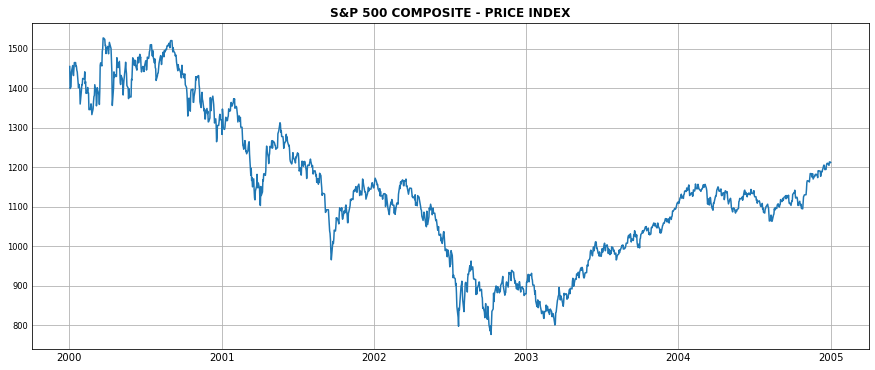

In [6]:
fig , ax = plt.subplots(figsize=(15,6))
ax.tick_params('x', length=0, labelsize="medium", which='major')
ax.tick_params('y', length=0, labelsize="small", which='major')

ax.set_title(df.columns[0], weight="semibold")
# ax.set_xlabel('Time', fontsize=20)
# ax.set_ylabel('Price', fontsize=20)
ax.plot(col_2000_2005)
ax.grid(True)
plt.savefig('fig1.png', dpi=600)

In [7]:
ret_2000_2005 = qp.scaled_return(col_2000_2005,1)
ret_col_2000_2005 = pd.Series(ret_2000_2005, index=col_2000_2005.index[1:])

# Fig 2

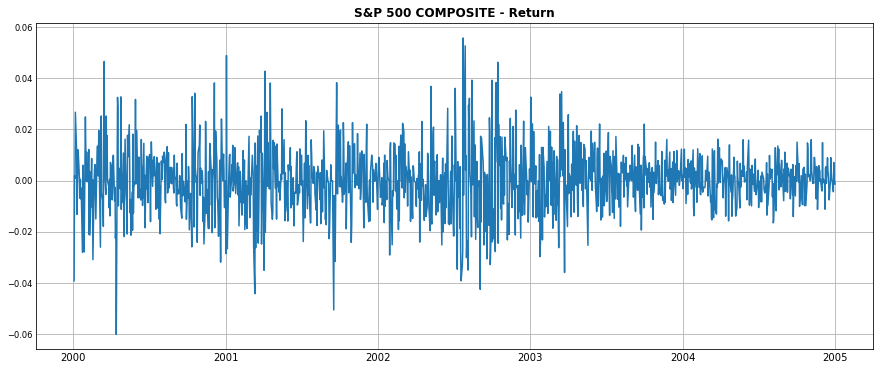

In [8]:
fig , ax = plt.subplots(figsize=(15,6))
ax.tick_params('x', length=0, labelsize="medium", which='major')
ax.tick_params('y', length=0, labelsize="small", which='major')

# ax.set_xticklabels()

ax.set_title(df.columns[0][:-11]+'Return', weight="semibold")
# ax.set_xlabel('Time', fontsize=20)
# ax.set_ylabel('Price', fontsize=20)
ax.plot(ret_col_2000_2005)
ax.grid(True)
plt.savefig('fig2.png', dpi=600)

# Fig 3

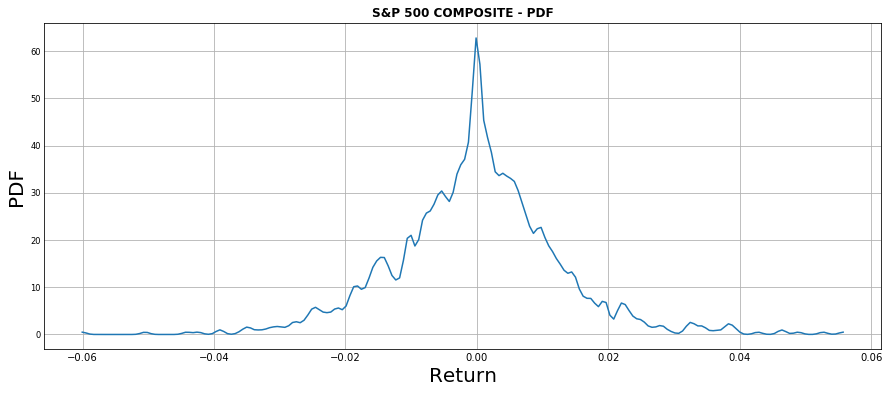

In [9]:
x, pdf = qp.pdf_sklearn(ret_2000_2005,0.05)

fig , ax = plt.subplots(figsize=(15,6))
ax.tick_params('x', length=0, labelsize="medium", which='major')
ax.tick_params('y', length=0, labelsize="small", which='major')

# ax.set_xticklabels()

ax.set_title(df.columns[0][:-11]+'PDF', weight="semibold")
ax.set_xlabel('Return', fontsize=20)
ax.set_ylabel('PDF', fontsize=20)
ax.plot(x , pdf)
ax.grid(True)
plt.savefig('fig3.png', dpi=600)

# Fig 4

In [10]:
x,qpot = qp.numpy_qpot(ret_2000_2005,0.0005)
cl_x , cl_qpot = cleaned_qpot(x , qpot)
cl_qpot/=5

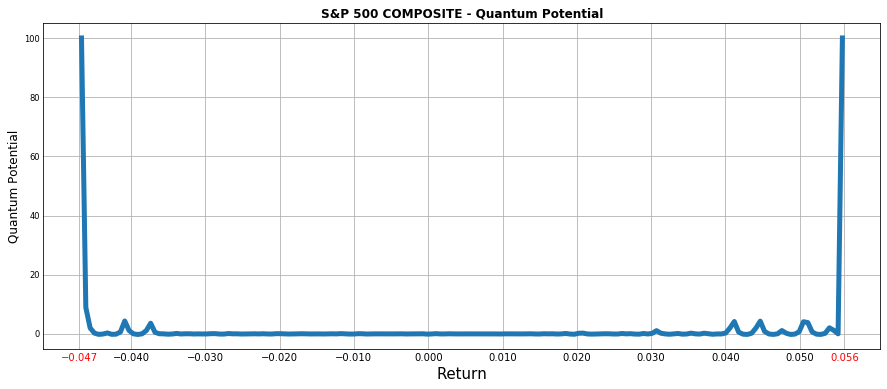

In [12]:
fig , ax = plt.subplots(figsize=(15,6))

# x_labels = np.append(x_labels ,)
ax.tick_params('x', length=0, labelsize="medium", which='major')
ax.tick_params('y', length=0, labelsize="small", which='major')

# ax.set_xticklabels()

ax.set_title(df.columns[0][:-11]+'Quantum Potential', weight="semibold")
ax.set_xlabel('Return', fontsize=15)
ax.set_ylabel('Quantum Potential', fontsize=12)
ax.plot(cl_x , cl_qpot, linewidth=5)
ax.grid(True)


#Setting colors to xticks
x_labels = np.arange((int(min(cl_x)*100)-1)/100 , (int(max(cl_x)*100)+1)/100, 0.01)
x_labels = np.append(x_labels , [np.round(cl_x[-1],3), np.round(cl_x[0],3)])
x_labels = np.sort(x_labels)
x_labels = x_labels[(x_labels>=np.round(cl_x[0],3)) & (x_labels<=np.round(cl_x[-1],3))]

plt.xticks(x_labels)

my_col = ['r']
for i in range(len(x_labels)-2):
    my_col.append('black')
my_col.append('r')  
for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(), my_col):
    ticklabel.set_color(tickcolor)

plt.savefig('fig4.png', dpi=600)